In [47]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
import numpy as np
%matplotlib inline

dfs = pd.read_csv('/Users/jfreeley/GA-DSI/DSI_IMAGE/curriculum/week-03/5.1-regression-challenge/datasets/ranking-submission.csv')
dfc = pd.read_csv('/Users/jfreeley/GA-DSI/DSI_IMAGE/curriculum/week-03/5.1-regression-challenge/datasets/challenge-dataset.csv')

dfc.loc[dfc['income'] == '-', 'income'] = 41.0 #MEDIAN of NON-DASHES
dfc['income'] = dfc['income'].astype(float)    
dfc['international_students'] = dfc['international_students'].str.replace('%', '')
dfc.loc[dfc['international_students'].isnull(), 'international_students'] = 13
dfc['international_students'] = dfc['international_students'].astype(float)
dfc.loc[dfc['international'] == '-', 'international'] = 50.3 #MEDIAN of NON-DASHES
dfc['international'] = dfc['international'].astype(float) 
dfc['world_rank'] = pd.to_numeric(dfc['world_rank'], errors='coerce')
dfc['world_rank'].fillna(value=100, inplace=True) # *100* = MEDIAN of NON-DASHES
dfc['world_rank'] = dfc['world_rank'].astype(int)
dfc['num_students'] = dfc['num_students'].str.replace(',', '')
dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)
dfc.loc[dfc['num_students'].isnull(), 'num_students'] = 20851.0 #MEDIAN of NON-NULLS
dfc.loc[dfc['student_staff_ratio'].isnull(), 'student_staff_ratio'] = 16.1 #MEDIAN of NON-NULLS


In [48]:
#print dfc.head(5)

#def clean_intl(x):
#    x.strip('%')

#dfc['student_staff_ratio'].unique()
#dfc_stu_not = dfc[dfc['student_staff_ratio'].notnull()]
#dfc_stu_not['student_staff_ratio'].median()

#dfc['income'] = dfc['international_students'].apply(clean_intl)
#dfc['income'].unique()
#print dfc.dtypes
#dfc_train = dfc[dfc['total_score'].notnull()]
#dfc_train.count()
dfc.count()

world_rank                2603
university_name           2603
country                   2603
teaching                  2603
international             2603
research                  2603
citations                 2603
income                    2603
total_score               1803
num_students              2603
student_staff_ratio       2603
international_students    2603
female_male_ratio         2370
year                      2603
dtype: int64

/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


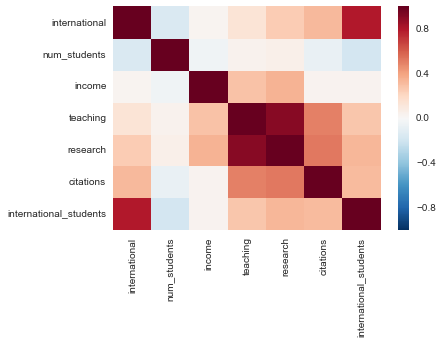

In [49]:
cols = ['international','num_students','income', 'teaching', 'research', 'citations', \
        'international_students', 'total_score']
df2 = dfc.copy()[cols]
dfc_X = df2[(df2['total_score'] != '-') & (df2['total_score'].notnull())]
dfc_X.drop('total_score', axis=1, inplace=True)
#print dfc_X.dtypes
dfc_train = dfc[(dfc['total_score'] != '-') & (dfc['total_score'].notnull())]
train_cols = ['total_score']
train = dfc_train.copy()[train_cols]

 
#print df2
sns.heatmap(df2.corr())

In [50]:
a = pd.Series([1,2,3,4])
print a.apply(lambda x: x**3)

0     1
1     8
2    27
3    64
dtype: int64
